In [60]:
import pandas as pd

Introduction to the Dataset:

Download the dataset from Kaggle.
Load the dataset using Pandas.
Perform initial exploration to understand the dataset structure : whats the distribution of the data? What types of data do i have?

In [61]:
df = pd.read_csv(r'/survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [62]:
df.shape # the dimensions (rows, columns) of the dataset

(1259, 27)

In [63]:
df.describe() #summary statistics for numerical columns

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


We can observe that the dataset contains only the 'Age' column, which provides quantitative data. However, the 'no_employees' column includes phrases like 'more than,' which prevents considering it as a quantitative data type. Therefore, to analyze this column effectively, I'll need to clean the data. All other columns contain qualitative data.

In [64]:
df.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

We can observe that there are several columns with emty data, I'll need to manage with this.
Column 'state' incomplete, but that,probaly, means that analized population not only from the USA.
Regarding other incomplete columns, such as 'self_employed' and 'work_interfere,' I'll need to closely examine this data.
Column 'comments' not mandatory to fill, so there shouldn't be any issues with this column.

In [65]:
df['Age'].value_counts() #Check the distribution of categorical data

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72         

We can observe that there are a lot of data that has no sense. For example, negative numbers, or numbers under the age possible and legally permitted working range (1 - 12/16 in our case), and also too high numbers such as '329', '9999999999'. Cleaning this column to rectify these inconsistencies will be necessary

In [66]:
df['no_employees'].value_counts() #Check the distribution of categorical data

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64

Data cleaning

In [67]:
df.duplicated() # Identify if there are any duplicate rows

0       False
1       False
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257    False
1258    False
Length: 1259, dtype: bool

In [68]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Timestamp, Age, Gender, Country, state, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments]
Index: []

[0 rows x 27 columns]


No duplecated rows are detected

In [69]:
missing_data = df.isnull() # Check for missing values in a DataFrame
print(missing_data.head())

   Timestamp    Age  Gender  Country  state  self_employed  family_history  \
0      False  False   False    False  False           True           False   
1      False  False   False    False  False           True           False   
2      False  False   False    False   True           True           False   
3      False  False   False    False   True           True           False   
4      False  False   False    False  False           True           False   

   treatment  work_interfere  no_employees  ...  leave  \
0      False           False         False  ...  False   
1      False           False         False  ...  False   
2      False           False         False  ...  False   
3      False           False         False  ...  False   
4      False           False         False  ...  False   

   mental_health_consequence  phys_health_consequence  coworkers  supervisor  \
0                      False                    False      False       False   
1                     

In [70]:
missing_data = df.columns[df.isnull().any()].tolist()
print(missing_data)

['state', 'self_employed', 'work_interfere', 'comments']


As we've alreade said, that there are several columns with emty data. Column 'state' incomplete, but that,probaly, means that analized population not only from the USA. Regarding other incomplete columns, such as 'self_employed' and 'work_interfere,' I'll need to closely examine this data ans see how I can complete missing data. Column 'comments' not mandatory to fill, and there are a lot of missing data, so I desided to drop this irrelevant column.

In [99]:
df.drop(['comments'], axis=1, inplace=True) #drop column 'comments'

In [100]:
df['self_employed'].fillna('NA', inplace=True) #replace missing data in 'self_employed' column with 'NA'

In [101]:
df['work_interfere'].fillna('NA', inplace=True) #replace missing data in 'work_interfere' column with 'NA'

In [103]:
df['state'].fillna('NA', inplace=True) #replace missing data in 'state' column with 'NA'

In [104]:
#check
missing_data = df.columns[df.isnull().any()].tolist()
print(missing_data)

[]


Now there is no any column with missing data

In [71]:
df['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [72]:
df['state'].value_counts()

CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
OR     29
PA     29
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      8
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: state, dtype: int64

As I suspected, the analyzed population hails from various countries, which explains the incomplete nature of the 'state' column. Therefore, there is no problems with this column.

In [73]:
df['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [74]:
df['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

Regarding this two columns, there are no problematic values, rather these columns are incomplete. I'll check if I need these column for my analysis and determine how to handle the missing data.


Q: What is the distribution of mental health conditions among different age groups in the tech industry?
In order to answer this question, first of all I'll manage with inconsistencies in 'age' column, what we've talked above.

In [75]:
valid_age_range = df[(df['Age'] >= 20) & (df['Age'] <= 85)]['Age']
mean_age = valid_age_range.mean() # Calculate the mean of valid ages
df.loc[df['Age'] < 18, 'Age'] = mean_age  # Replace ages below 20
df.loc[df['Age'] > 85, 'Age'] = mean_age  # Replace ages above 85 or any other threshold
df['Age']



0       37.0
1       44.0
2       32.0
3       31.0
4       31.0
        ... 
1254    26.0
1255    32.0
1256    34.0
1257    46.0
1258    25.0
Name: Age, Length: 1259, dtype: float64

In [76]:
df['Age'].value_counts() #check

29.000000    85
32.000000    82
26.000000    75
27.000000    71
33.000000    70
28.000000    68
31.000000    67
34.000000    65
30.000000    63
25.000000    61
35.000000    55
23.000000    51
24.000000    46
37.000000    43
38.000000    39
36.000000    37
39.000000    33
40.000000    33
43.000000    28
22.000000    21
41.000000    21
42.000000    20
21.000000    16
46.000000    12
45.000000    12
44.000000    11
19.000000     9
32.251822     8
18.000000     7
50.000000     6
48.000000     6
20.000000     6
51.000000     5
56.000000     4
49.000000     4
57.000000     3
55.000000     3
54.000000     3
47.000000     2
60.000000     2
58.000000     1
62.000000     1
65.000000     1
53.000000     1
61.000000     1
72.000000     1
Name: Age, dtype: int64

In [77]:
df['Age'].describe()

count    1259.000000
mean       32.077851
std         7.265074
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

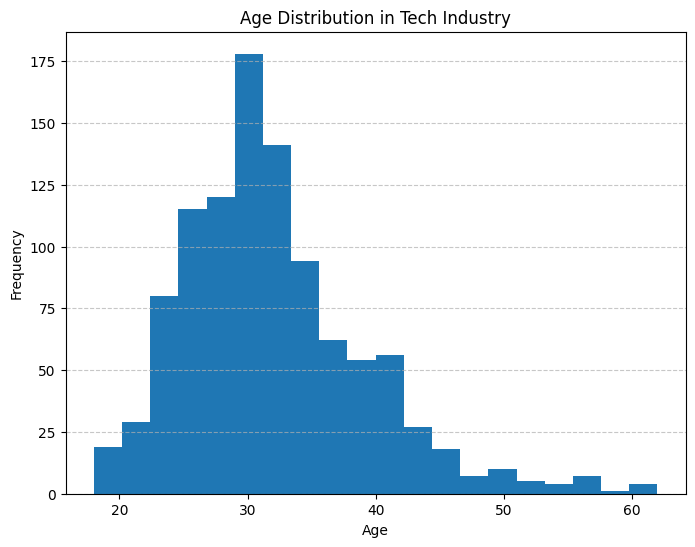

In [78]:
import matplotlib.pyplot as plt
tech_data = df[df['tech_company'] == 'Yes'] #Filter for rows where 'tech_company' is 'Yes'
tech_age = tech_data['Age'] #Extracting ages for 'Yes' in 'tech_company'
plt.figure(figsize=(8, 6))
plt.hist(tech_age, bins=20)
plt.title('Age Distribution in Tech Industry')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




In [79]:
df.describe()

,Age
count,1259.000000
mean,32.077851
std,7.265074
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


We can see the distribution of mental health conditions among different age groups in the tech industry. An Average age is 32, min age = 18, max = 72.

Q: How does the frequency of mental health issues vary by gender?

In [80]:
df['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

Next step, I'll standartize data in column 'Gender' in order to analyze this.

In [81]:
# Define standard gender categories
male_terms = ['male', 'm', 'make', 'man', 'msle', 'malr', 'mail', 'maile', 'mal', 'male (cis)']
female_terms = ['female', 'f', 'femake', 'woman', 'femail']
other = ['neuter', 'queer', 'agender', 'androgyne', 'enby', 'non-binary', 'genderqueer','female (trans)', 'trans woman', 'trans-female']
# Function to categorize gender
def categorize_gender(gender):
    gender_lower = str(gender).lower()
    if gender_lower in male_terms:
        return 'Male'
    elif gender_lower in female_terms:
        return 'Female'
    else:
        return 'Other'
df['Gender'] = df['Gender'].apply(categorize_gender)
df['Gender'].value_counts()


Male      983
Female    242
Other      34
Name: Gender, dtype: int64

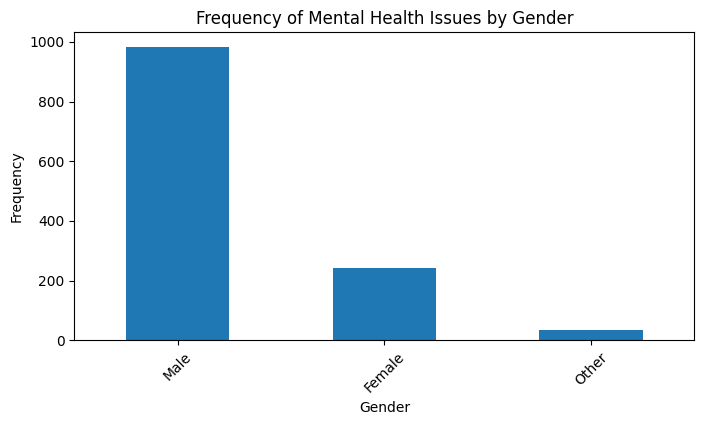

In [82]:
df['Gender'].value_counts().plot(kind='bar', figsize=(8, 4))
plt.title('Frequency of Mental Health Issues by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [83]:
df['Gender'].describe()

count     1259
unique       3
top       Male
freq       983
Name: Gender, dtype: object

We can see male has more mental issue: 983 male gender from

1259 of all analysed population.

Q: Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.


In [95]:
tech_data = df[df['tech_company'] == 'Yes']
grouped_by_country_tech = tech_data.groupby('Country')
mental_health_rates = grouped_by_country_tech['treatment'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
# Finding the country with the highest reported rate of mental health issues in the tech industry
country_highest_rate = mental_health_rates.idxmax()
highest_rate = mental_health_rates.max()

# Finding the country with the lowest reported rate of mental health issues in the tech industry
country_lowest_rate = mental_health_rates.idxmin()
lowest_rate = mental_health_rates.min()

print(f"Highest Rate: {country_highest_rate} - {highest_rate:}%")
print(f"Lowest Rate: {country_lowest_rate} - {lowest_rate:}%")


Highest Rate: Bahamas, The - 100.0%
Lowest Rate: Austria - 0.0%
